# DatosReto - POSO


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Cargar las bases de datos

In [2]:
diesel2020 = pd.read_excel('POSO/Consolidado Diesel 2020.xlsx')
diesel2021 = pd.read_excel('POSO/Consolidado Diesel 2021.xlsx')
diesel2022 = pd.read_excel('POSO/Consolidado Diesel 2022.xlsx')
diesel2023 = pd.read_excel('POSO/Consolidado Diesel 2023.xlsx')
diesel2024 = pd.read_excel('POSO/Consolidado Diesel 2024.xlsx')

In [24]:
diesel = pd.concat([diesel2020, diesel2021, diesel2022, diesel2023, diesel2024], ignore_index=True)

In [ ]:
diesel

# ELIMINAR LAS COLUMAS QUE YA HABIAMOS ANALIZADO Y VOLVER A PONER EL ANALISIS DE FECHAS

### Tamaño del dataset

In [4]:
print("El dataset tiene", diesel.shape[0], "filas y", diesel.shape[1], "columnas.")

El dataset tiene 35001 filas y 64 columnas.


Corregir tipos de datos

In [25]:
# Nombres y tipos de datos de las columnas, valores posibles y nulos
for col in diesel.columns:
    print(f"Columna: {col}")
    print(f"Tipo de dato: {diesel[col].dtype}")
    print(f"Valores únicos: {diesel[col].unique()[:5]}")
    print(f"Valores nulos: {diesel[col].isnull().sum()}, {diesel[col].isnull().sum()/len(diesel)*100:.2f}%")
    print("-" * 50)

Columna: FOLIO DORS
Tipo de dato: object
Valores únicos: ['DI20742' 'DIE-016932' 'DIE-016933' 'DIE-016934' 'DIE-016935']
Valores nulos: 0, 0.00%
--------------------------------------------------
Columna: Fuera de Procedimiento
Tipo de dato: object
Valores únicos: ['NO' nan 'SI']
Valores nulos: 31539, 90.11%
--------------------------------------------------
Columna: Fecha de Solicitud
Tipo de dato: datetime64[ns]
Valores únicos: ['2019-12-19T00:00:00.000000000'                           'NaT'
 '2019-12-16T00:00:00.000000000' '2019-12-04T00:00:00.000000000'
 '2019-12-20T00:00:00.000000000']
Valores nulos: 17552, 50.15%
--------------------------------------------------
Columna: Hora de Solicitud
Tipo de dato: object
Valores únicos: [datetime.time(19, 30) datetime.time(0, 0) datetime.time(11, 29)
 datetime.time(5, 42) datetime.time(15, 2)]
Valores nulos: 10224, 29.21%
--------------------------------------------------
Columna: MEDIO
Tipo de dato: object
Valores únicos: ['DORS' nan]
Valo

# Exploracion de datos

In [6]:
columns_Id = []
categorical_columns = []

## Medidas estadisticas

### Cuantitativas

In [7]:
#Medidas de tendencial central, promedio, media, mediana y moda. Maximo, minimo, varianza y desviacion estandar
for col in diesel.columns:
    if diesel[col].dtype in ['int64', 'float64']:
        print(f"Columna: {col}")
        print(f"Promedio: {diesel[col].mean()}")
        print(f"Media: {diesel[col].median()}")
        print(f"Moda: {diesel[col].mode()[0]}")
        print(f"Máximo: {diesel[col].max()}")
        print(f"Mínimo: {diesel[col].min()}")
        print(f"Varianza: {diesel[col].var()}")
        print(f"Desviación estándar: {diesel[col].std()}")
        print("-" * 50)

Columna: KM
Promedio: 82333.11165514594
Media: 73501.0
Moda: 0.0
Máximo: 1008410.0
Mínimo: 0.0
Varianza: 8194711229.863487
Desviación estándar: 90524.64432331941
--------------------------------------------------
Columna: Cant. Sum.
Promedio: 2388.421577224199
Media: 238.0
Moda: 0.0
Máximo: 69849.0
Mínimo: 0.0
Varianza: 70097275.54695907
Desviación estándar: 8372.411572955492
--------------------------------------------------
Columna: PRECIO POR LT
Promedio: 1869.97114171012
Media: 19.541070689655175
Moda: 17.43
Máximo: 23747.97
Mínimo: 0.0
Varianza: 32522453.88084363
Desviación estándar: 5702.846121091085
--------------------------------------------------
Columna: COSTO DE SUMINISTRO
Promedio: 41550.75746666477
Media: 4191.489999999188
Moda: 0.0
Máximo: 1147571.86
Mínimo: 0.0
Varianza: 20687888023.523884
Desviación estándar: 143832.84751239503
--------------------------------------------------
Columna: FLETE
Promedio: 0.06562679108327193
Media: 0.0
Moda: 0.0
Máximo: 1.0
Mínimo: 0.0
Va

### Cualitativas

In [1]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le = LabelEncoder()

In [10]:
# Tabla de frecuencias
for col in categorical_columns:
    print(f"Columna: {col}")
    print(diesel[col].value_counts())
    print("-" * 50)
    ordinal_col = le.fit_transform(diesel[col])
    #Obtener el valor mas frecuente
    most_frequent = diesel[col].mode()[0]
    print(f"Valor más frecuente: {most_frequent}")

## Visualización

In [11]:
#Medidas de posición no central- cuartiles, outliers, valores atípicos
for col in diesel.columns:
    if diesel[col].dtype in ['int64', 'float64']:
        print(f"Columna: {col}")
        Q1 = diesel[col].quantile(0.25)
        Q3 = diesel[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = diesel[(diesel[col] < lower_bound) | (diesel[col] > upper_bound)]
        print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
        print(f"Valores atípicos: {outliers.shape[0]} porcentaje: {outliers.shape[0]/len(diesel)*100:.2f}%")
        print("-" * 50)

Columna: KM
Q1: 36627.5, Q3: 104173.75, IQR: 67546.25
Valores atípicos: 5 porcentaje: 0.01%
--------------------------------------------------
Columna: Cant. Sum.
Q1: 78.5999999998603, Q3: 600.0, IQR: 521.4000000001397
Valores atípicos: 780 porcentaje: 2.23%
--------------------------------------------------
Columna: PRECIO POR LT
Q1: 18.12, Q3: 20.377277586206898, IQR: 2.2572775862068966
Valores atípicos: 5180 porcentaje: 14.80%
--------------------------------------------------
Columna: COSTO DE SUMINISTRO
Q1: 1396.0, Q3: 10459.743000001623, IQR: 9063.743000001623
Valores atípicos: 784 porcentaje: 2.24%
--------------------------------------------------
Columna: FLETE
Q1: 0.0, Q3: 0.0, IQR: 0.0
Valores atípicos: 5480 porcentaje: 15.66%
--------------------------------------------------
Columna: FLETE / MANIOBRA
Q1: 0.0, Q3: 0.0, IQR: 0.0
Valores atípicos: 6747 porcentaje: 19.28%
--------------------------------------------------
Columna: COSTO TOTAL
Q1: 2454.28365, Q3: 14065.09885000

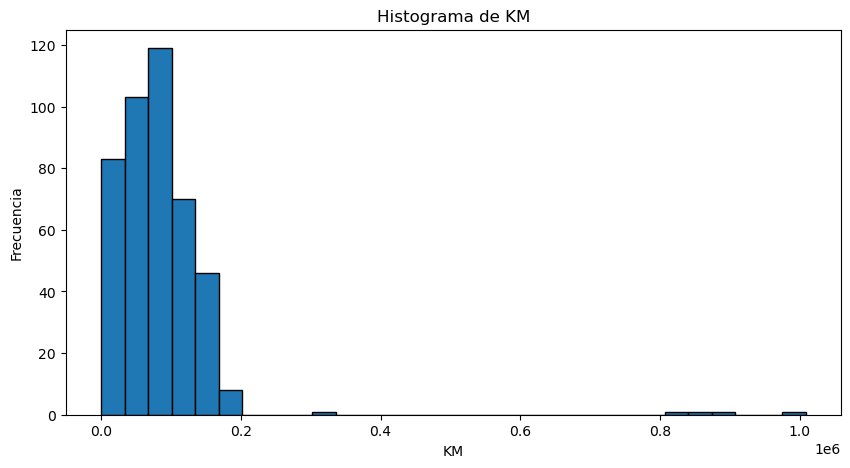

Columna: KM
KM tiene una distribución sesgada a la derecha.


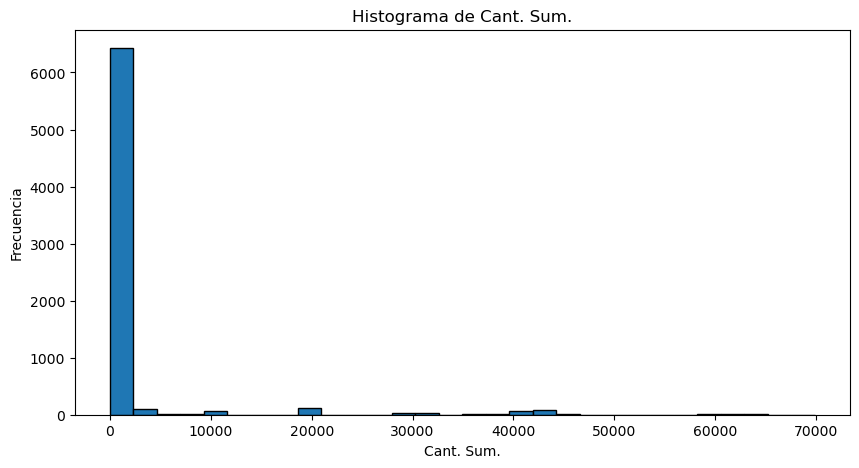

Columna: Cant. Sum.
Cant. Sum. tiene una distribución sesgada a la derecha.


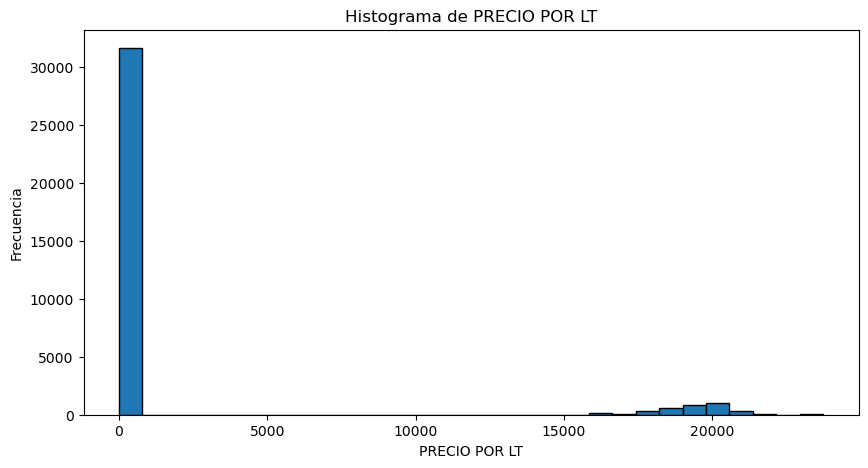

Columna: PRECIO POR LT
PRECIO POR LT tiene una distribución sesgada a la derecha.


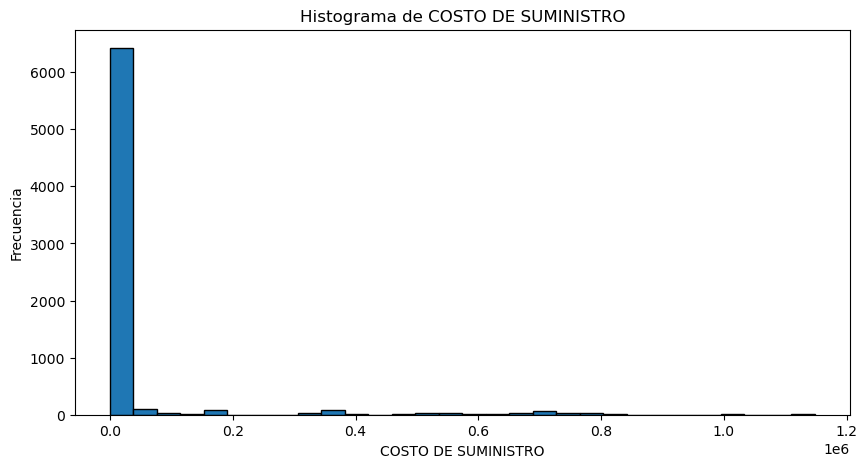

Columna: COSTO DE SUMINISTRO
COSTO DE SUMINISTRO tiene una distribución sesgada a la derecha.


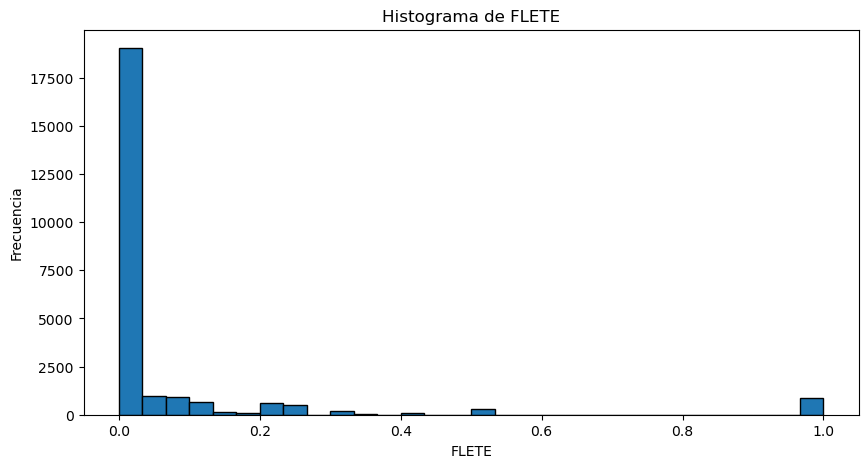

Columna: FLETE
FLETE tiene una distribución sesgada a la derecha.


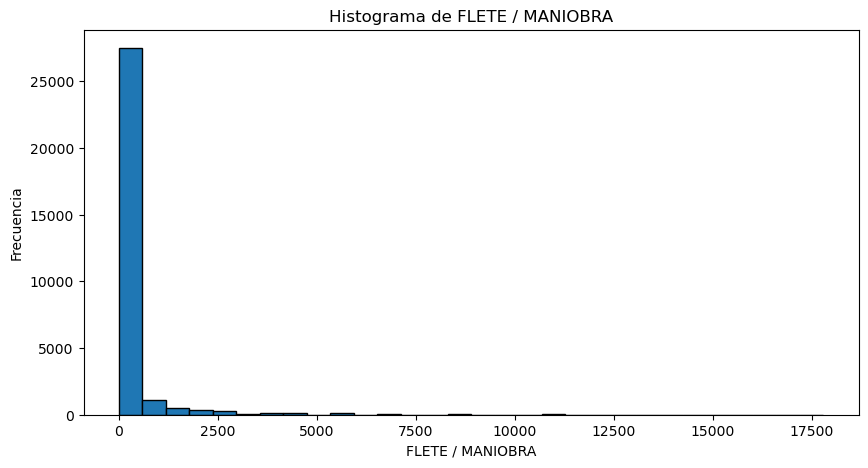

Columna: FLETE / MANIOBRA
FLETE / MANIOBRA tiene una distribución sesgada a la derecha.


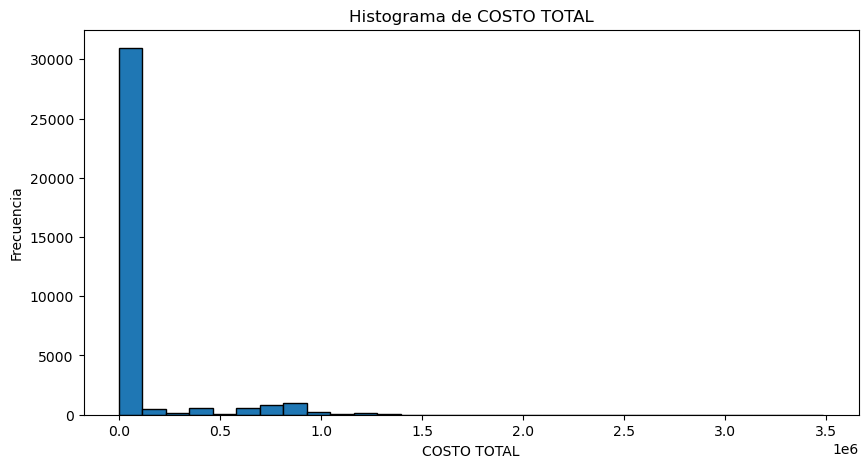

Columna: COSTO TOTAL
COSTO TOTAL tiene una distribución sesgada a la derecha.


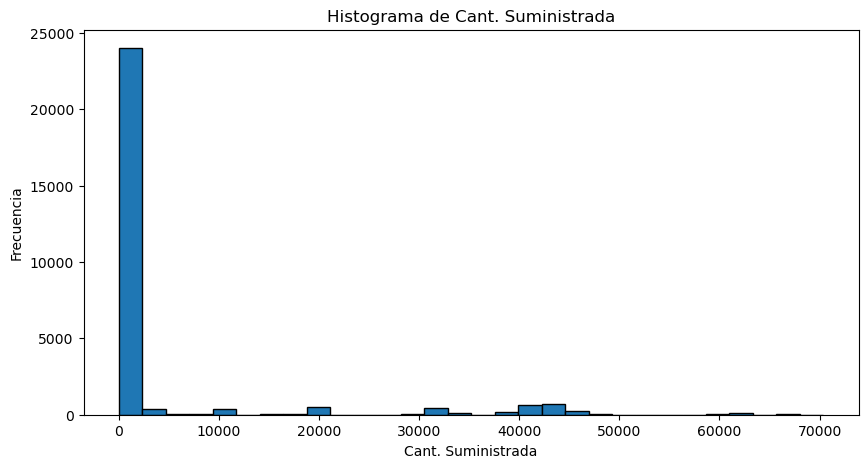

Columna: Cant. Suministrada
Cant. Suministrada tiene una distribución sesgada a la derecha.


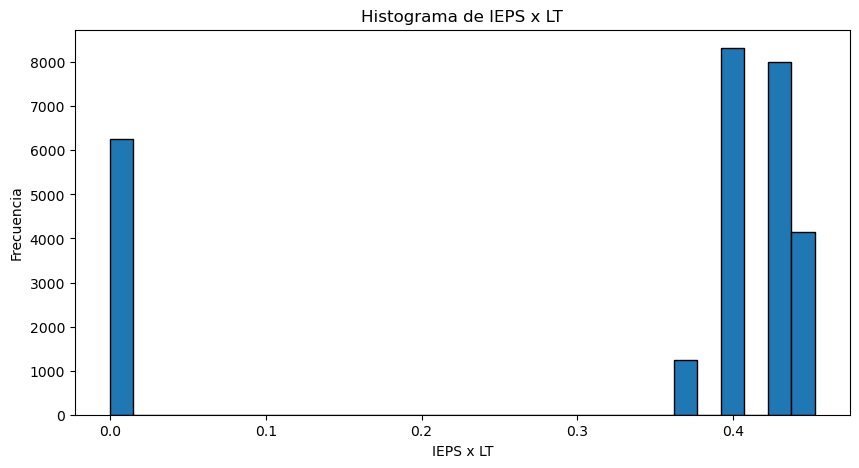

Columna: IEPS x LT
IEPS x LT tiene una distribución sesgada a la izquierda.


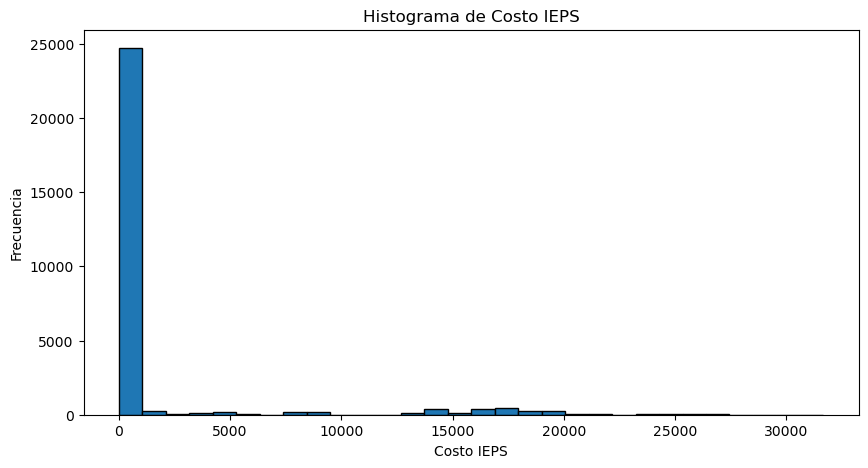

Columna: Costo IEPS
Costo IEPS tiene una distribución sesgada a la derecha.


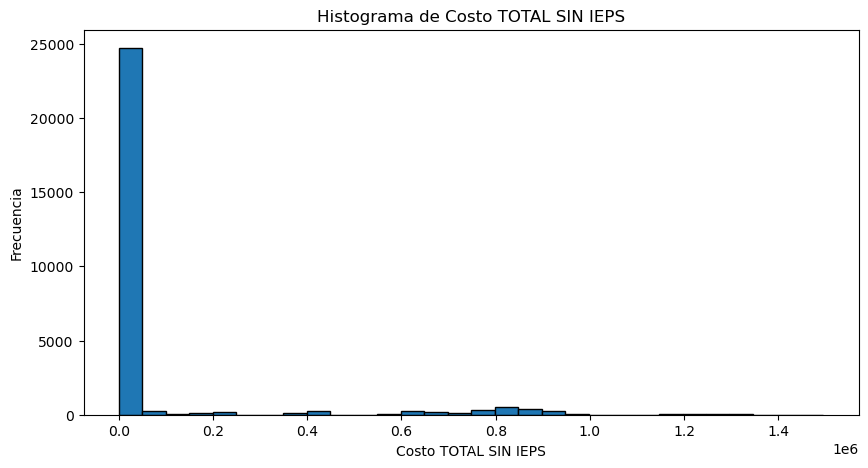

Columna: Costo TOTAL SIN IEPS
Costo TOTAL SIN IEPS tiene una distribución sesgada a la derecha.


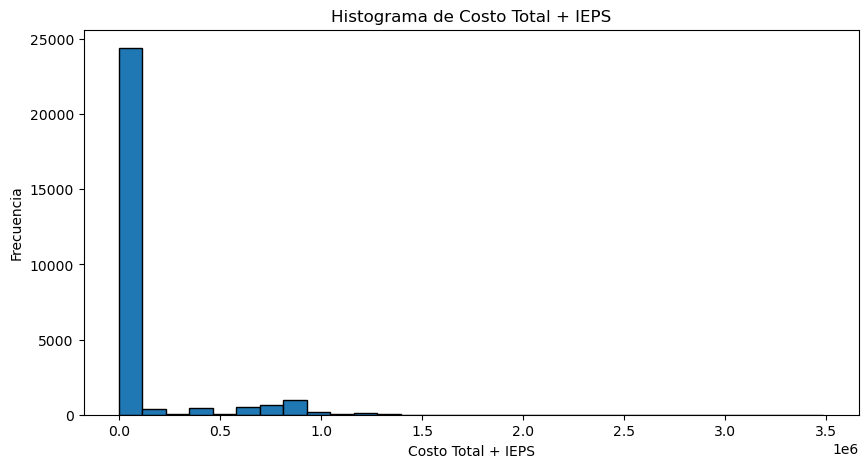

Columna: Costo Total + IEPS
Costo Total + IEPS tiene una distribución sesgada a la derecha.


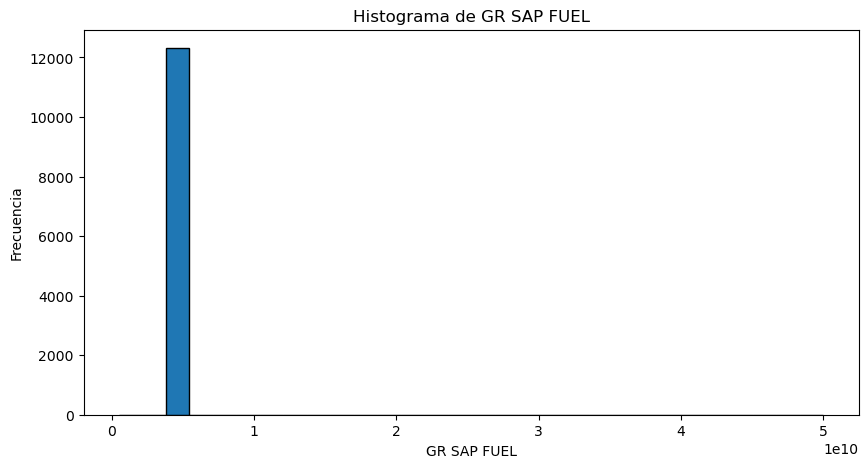

Columna: GR SAP FUEL
GR SAP FUEL tiene una distribución sesgada a la derecha.


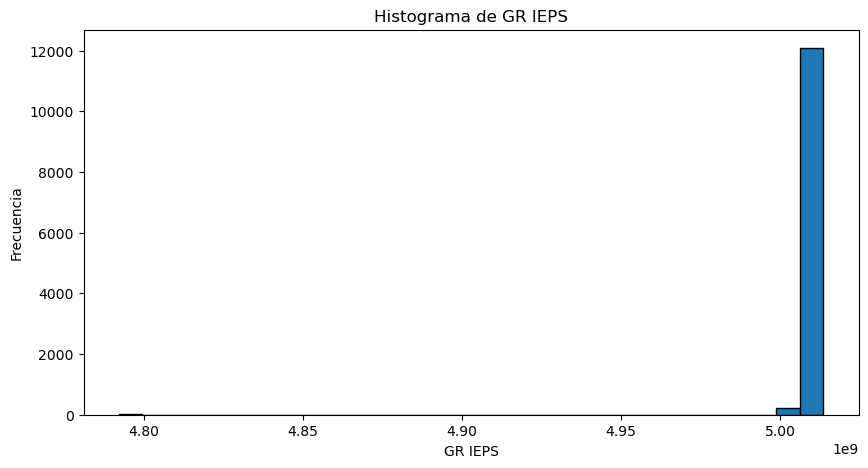

Columna: GR IEPS
GR IEPS tiene una distribución sesgada a la izquierda.


In [13]:
# Analisis de histogramas, revisar si es simetrica o no
for col in diesel.columns:
    if diesel[col].dtype in ['int64', 'float64']:
        plt.figure(figsize=(10, 5))
        plt.hist(diesel[col], bins=30, edgecolor='black')
        plt.title(f"Histograma de {col}")
        plt.xlabel(col)
        plt.ylabel("Frecuencia")
        plt.show()
        # plt.savefig(f"histograma_{col}.png")
        print(f"Columna: {col}")
        if diesel[col].skew() > 0:
            print(f"{col} tiene una distribución sesgada a la derecha.")
        elif diesel[col].skew() < 0:
            print(f"{col} tiene una distribución sesgada a la izquierda.")
        else:
            print(f"{col} tiene una distribución simétrica.")

C:\Users\jesus\AppData\Local\Temp\ipykernel_12164\56366751.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = diesel.corr()
c:\Users\jesus\anaconda3\envs\tf\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: title={'center': 'Matriz de correlación'}>

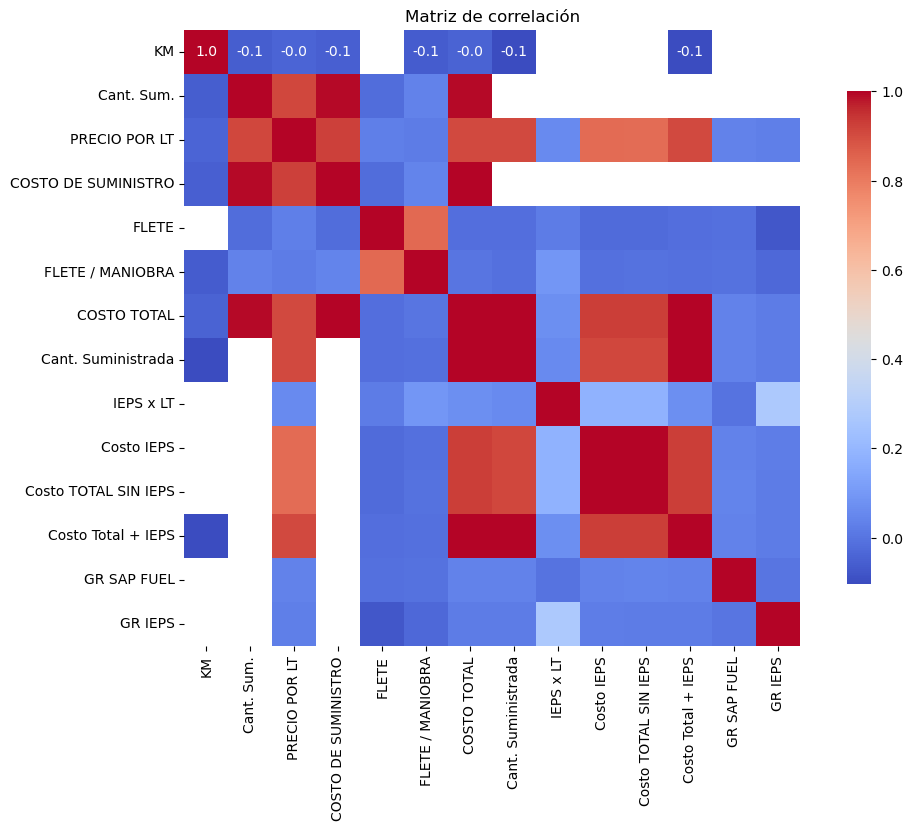

In [18]:
# Analisis de correlacion entre variables
correlation_matrix = diesel.corr()
plt.figure(figsize=(12, 8))
plt.title("Matriz de correlación")
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
# plt.xticks(rotation=4}5)
# plt.savefig("correlation_matrix.png")

## Variables cuantitativas

In [21]:
#Diagramas de barras
for column in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=diesel, x=column)
    plt.title(f"Diagrama de barras de {column}")
    plt.xlabel(column)
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45)
    plt.show()
    plt.savefig(f"diagrama_barras_{column}.png")
    

In [23]:
# Renombrar la primera columna debido a caracteres extraños
df = df.rename(columns={df.columns[0]: "FOLIO_DORS"})

# Convertir columnas numéricas relevantes a tipo adecuado
numeric_columns = ["Cant. Suministrada", "PRECIO POR LT", "Costo TOTAL SIN IEPS", "Costo Total + IEPS", "KM RECORRIDO", "GR SAP FUEL"]
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Convertir fecha de servicio a formato de fecha
df["Fecha de Servicio"] = pd.to_datetime(df["Fecha de Servicio"], errors="coerce", format="%d-%b")

# Verificar si la conversión fue exitosa
df.dtypes[["Fecha de Servicio", "Cant. Suministrada", "PRECIO POR LT", "Costo TOTAL SIN IEPS", "Costo Total + IEPS", "KM RECORRIDO"]]


NameError: name 'df' is not defined

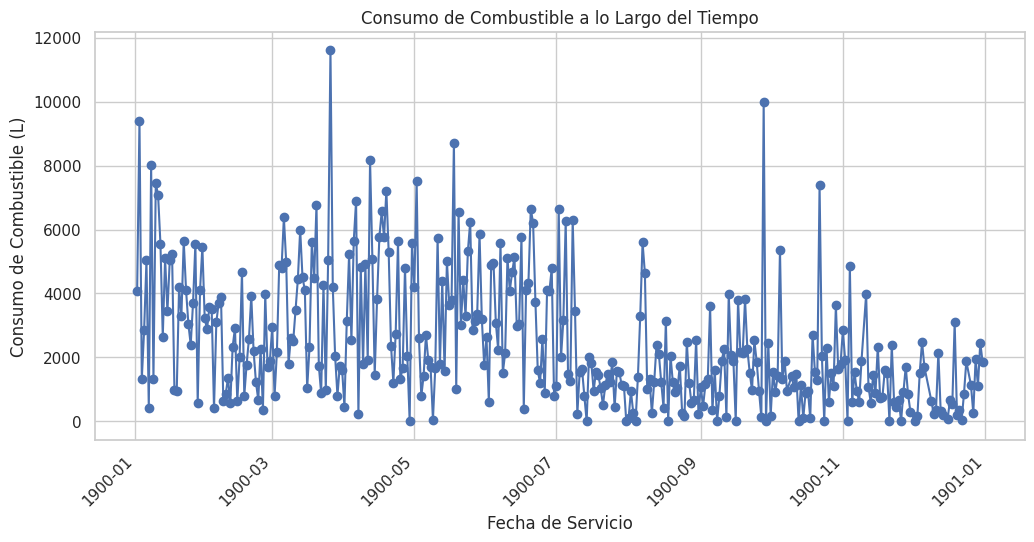

In [ ]:
# Configuración de estilo para gráficos
sns.set_theme(style="whitegrid")

# Análisis del consumo de combustible a lo largo del tiempo
plt.figure(figsize=(12, 6))
df.groupby("Fecha de Servicio")["Cant. Suministrada"].sum().plot(marker="o", linestyle="-")
plt.xlabel("Fecha de Servicio")
plt.ylabel("Consumo de Combustible (L)")
plt.title("Consumo de Combustible a lo Largo del Tiempo")
plt.xticks(rotation=45)
plt.show()


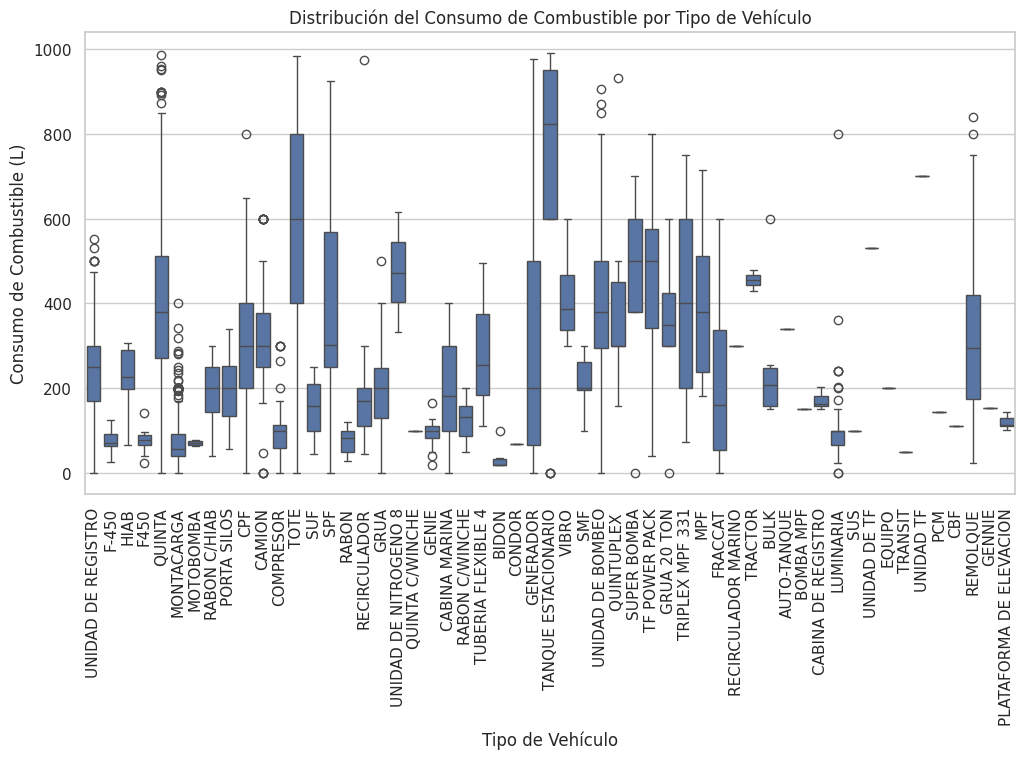

In [ ]:
# Análisis del consumo de combustible por tipo de vehículo
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Tipo de Unidad", y="Cant. Suministrada")
plt.xticks(rotation=90)
plt.xlabel("Tipo de Vehículo")
plt.ylabel("Consumo de Combustible (L)")
plt.title("Distribución del Consumo de Combustible por Tipo de Vehículo")
plt.show()

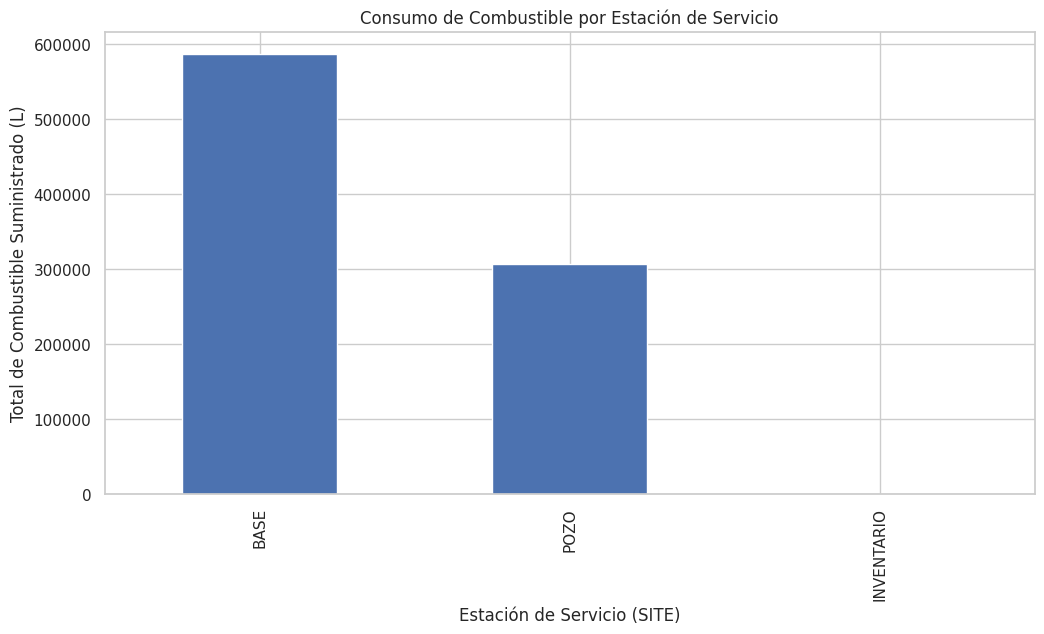

In [ ]:
# Análisis del consumo de combustible por estación de servicio (SITE)
plt.figure(figsize=(12, 6))
df.groupby("SITE")["Cant. Suministrada"].sum().sort_values(ascending=False).plot(kind="bar")
plt.xlabel("Estación de Servicio (SITE)")
plt.ylabel("Total de Combustible Suministrado (L)")
plt.title("Consumo de Combustible por Estación de Servicio")
plt.xticks(rotation=90)
plt.show()